<a href="https://colab.research.google.com/github/joyalkosti/makemore/blob/master/Language_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

model = defaultdict(lambda: defaultdict(lambda: 0))

for sentence in reuters.sents():
  for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
    model[(w1, w2)][w3] += 1
 
for w1_w2 in model:
  total_count = float(sum(model[w1_w2].values()))
  for w3 in model[w1_w2]:
    model[w1_w2][w3] /= total_count

In [ ]:
dict(model["Today", "the"])

{'company': 0.3333333333333333,
 'government': 0.3333333333333333,
 'World': 0.3333333333333333}

In [ ]:
import random

text = ["today", "the"]
sentence_finished = False
 
while not sentence_finished:
  r = random.random()
  accumulator = .0

  for word in model[tuple(text[-2:])].keys():
    accumulator += model[tuple(text[-2:])][word]
    if accumulator >= r:
      text.append(word)
      break

  if text[-2:] == [None, None]:
    sentence_finished = True
 
print (' '.join([t for t in text if t]))

today the newspaper interview which quoted him as saying that the bill , told reporters the Japanese will be another option and could be salvaged , the percentage of securities laws , a company executive said a number of jobless drawing unemployment benefit .


In [ ]:
word=open("/content/names.txt").read().splitlines()
word[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

# **Start Creating Biagrams**

In [ ]:
len(word)

32033

In [ ]:
for w in word[:1]:
  for ch1, ch2 in zip(w,w[1:]):
    print(ch1,ch2)

e m
m m
m a


In [ ]:
w

'emma'

In [ ]:
for w in word[:3]:
  ch=['<S>']+list(w)+['<E>']
  for ch1, ch2 in zip(ch,ch[1:]):
    print(ch1,ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [ ]:
b={}
for w in word:
  ch=['<S>']+list(w)+['<E>']
  for ch1, ch2 in zip(ch,ch[1:]):
    biagram=(ch1,ch2)
    b[biagram]=b.get(biagram, 0)+1


In [ ]:
b.items()

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [ ]:
sorted(b.items(), key=lambda kv:kv[1])

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [ ]:
sorted(b.items(), key=lambda kv:-kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
import torch
N=torch.zeros((28,28), dtype=torch.int32)

In [ ]:
chars=sorted(list(set(''.join(word))))
stoi={s:i for i,s in enumerate(chars)}
stoi['<S>']=26
stoi['<E>']=27

In [ ]:
for w in word:
  ch=['<S>']+list(w)+['<E>']
  for ch1, ch2 in zip(ch,ch[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    N[ix1, ix2]+=1
   

In [ ]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [ ]:
itos={i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

(-0.5, 27.5, 27.5, -0.5)

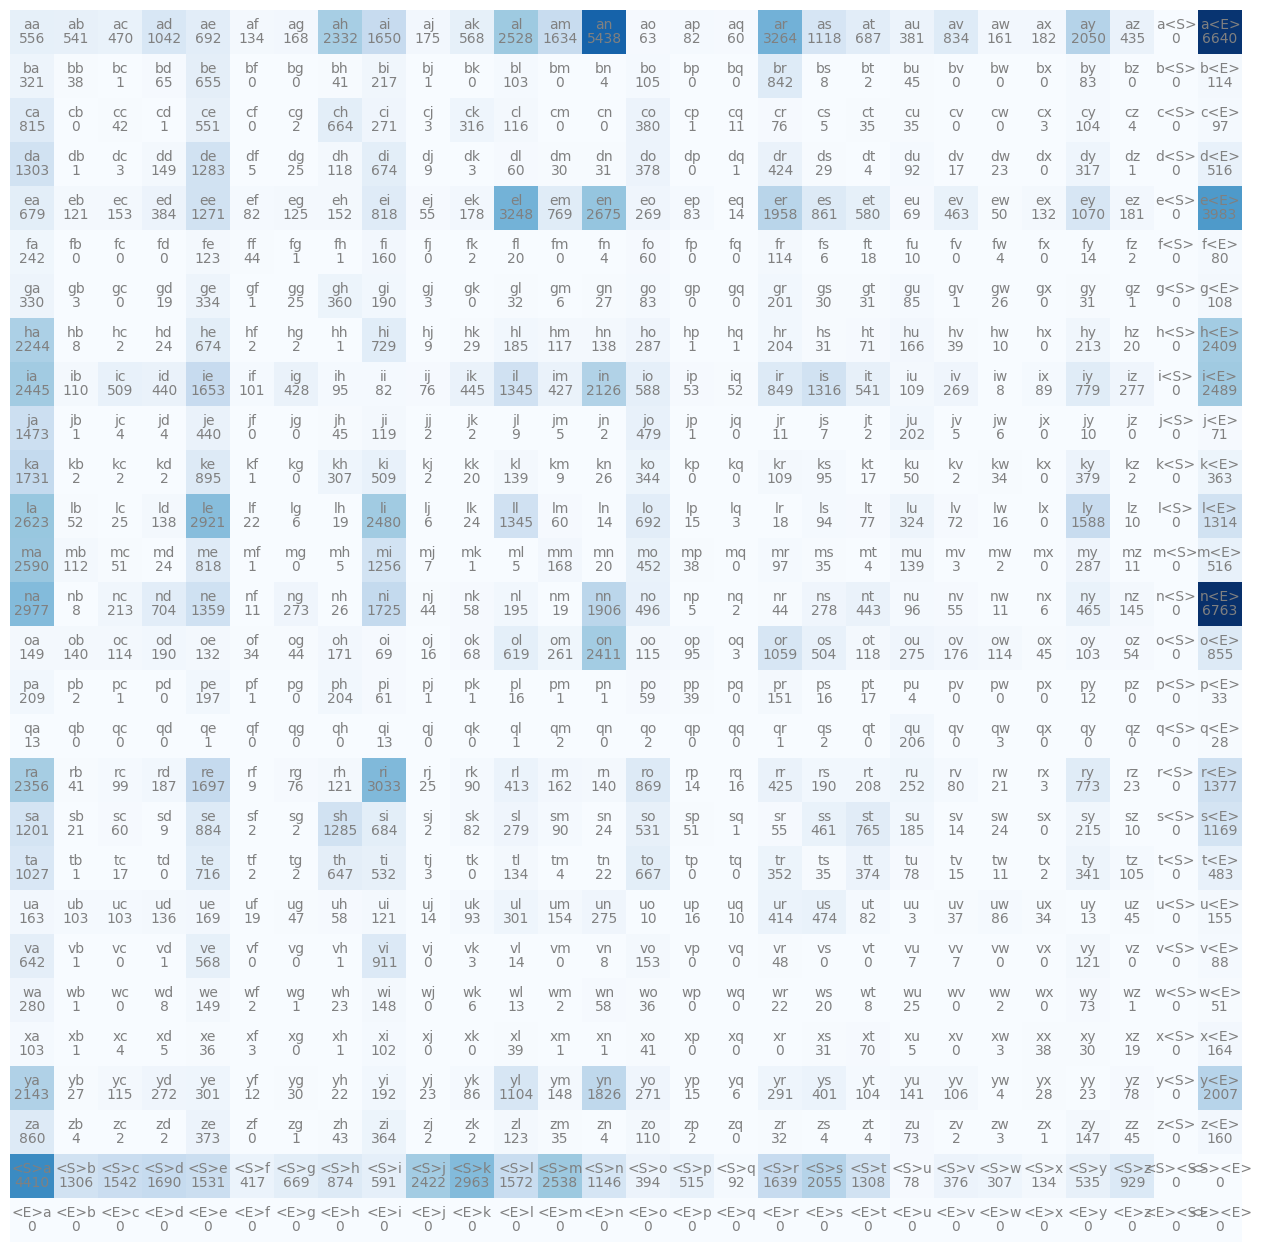

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
  for j in range(28):
    chrst=itos[i]+itos[j]
    plt.text(j, i,chrst, ha="center", va="bottom", color="gray")
    plt.text(j, i,N[i,j].item(), ha="center", va="top", color="gray")

plt.axis('off')



In [ ]:
New=torch.zeros((27,27), dtype=torch.int32)

In [ ]:
chars=sorted(list(set(''.join(word))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}


In [ ]:
for w in word:
  ch=['.']+list(w)+['.']
  for ch1, ch2 in zip(ch,ch[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    New[ix1, ix2]+=1

(-0.5, 26.5, 26.5, -0.5)

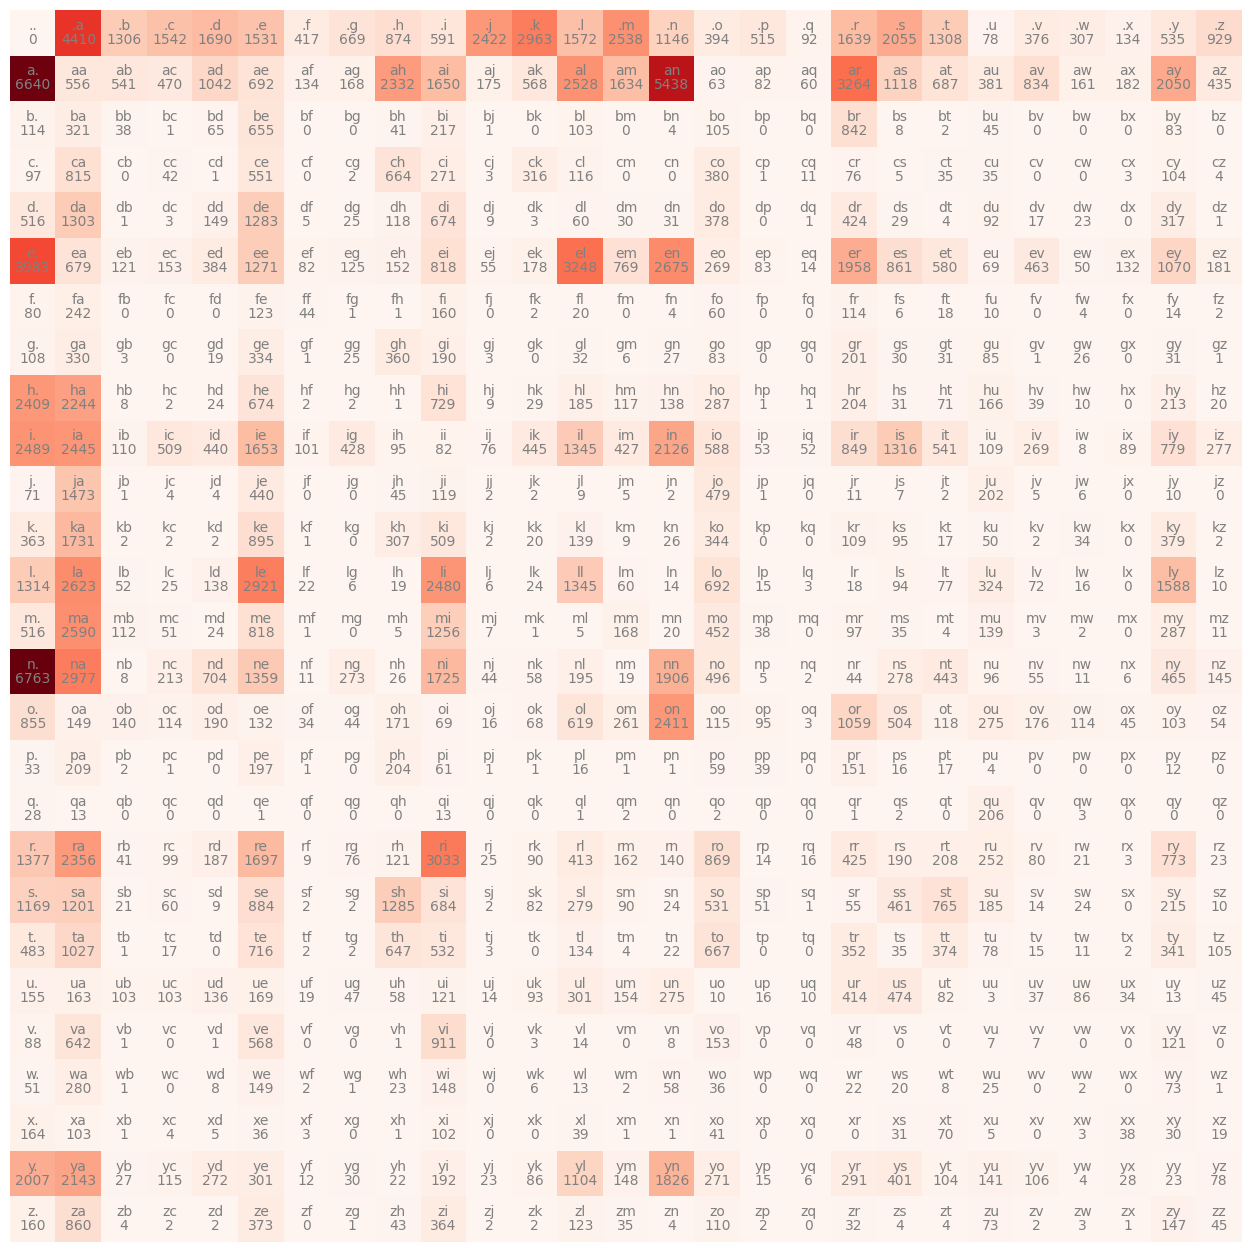

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(New, cmap='Reds')
for i in range(27):
  for j in range(27):
    chrst=itos[i]+itos[j]
    plt.text(j, i,chrst, ha="center", va="bottom", color="gray")
    plt.text(j, i,New[i,j].item(), ha="center", va="top", color="gray")

plt.axis('off')


In [ ]:
New[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

# **Probability Distribution**

In [ ]:
p=New[0].float()
p=p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

# **Sample Distribution Using Torch.MultiNomial**

---



---



In [ ]:
g=torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [ ]:
g=torch.Generator().manual_seed(2147483647)
p=torch.rand(3,generator=g)
p=p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
p.shape

torch.Size([3])

# **Here we create matrix of these row and column**

In [ ]:
P=New.float()
P.shape

torch.Size([27, 27])

In [ ]:
#Column vector
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [ ]:
#Row vector
P.sum(0, keepdim=True).shape

torch.Size([1, 27])

## BroadCasting Semnatics

In [ ]:
# 27,27 and 27,1 Combining(Easy beacuse they both have 2 Elements)
P=New.float()
P/=P.sum(1, keepdim=True)

In [ ]:
g=torch.Generator().manual_seed(2147483647)
for i in range(20):
  out=[]
  ix=0
  while True:
    p=P[ix]
    # p=New[ix].float()
    # p=p/p.sum()
    # p=torch.ones(27)/ 27.0
    ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


# **Evaluate the Quality of Model**

In [ ]:
#Sum of logs of Individual probability
log_likelyhood=0.0
n=0
for w in word[:3]:
  ch=['.']+list(w)+['.']
  for ch1, ch2 in zip(ch,ch[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    #Checking every word Probability
    prob=P[ix1,ix2] 
    #Doing log probability
    logprob=torch.log(prob)
    log_likelyhood+=logprob
    n+=1
    print(f'{ch1}{ch2}:{prob:.4f} {logprob:.4f}')

print(f'{log_likelyhood=}')
#Loss function
negative_log_likelyhood=-log_likelyhood
print(f'{negative_log_likelyhood=}')
print(f'{negative_log_likelyhood/n}')

.e:0.0478 -3.0408
em:0.0377 -3.2793
mm:0.0253 -3.6772
ma:0.3899 -0.9418
a.:0.1960 -1.6299
.o:0.0123 -4.3982
ol:0.0780 -2.5508
li:0.1777 -1.7278
iv:0.0152 -4.1867
vi:0.3541 -1.0383
ia:0.1381 -1.9796
a.:0.1960 -1.6299
.a:0.1377 -1.9829
av:0.0246 -3.7045
va:0.2495 -1.3882
a.:0.1960 -1.6299
log_likelyhood=tensor(-38.7856)
negative_log_likelyhood=tensor(38.7856)
2.424102306365967


# **Model** **Smoothing**

In [ ]:
P=(New+10000).float()
P/=P.sum(1, keepdim=True)

In [ ]:
g=torch.Generator().manual_seed(2147483647)
for i in range(20):
  out=[]
  ix=0
  while True:
    p=P[ix]
    # p=New[ix].float()
    # p=p/p.sum()
    # p=torch.ones(27)/ 27.0
    ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [ ]:
#Sum of logs of Individual probability
log_likelyhood=0.0
n=0
for w in word:
  ch=['.']+list(w)+['.']
  for ch1, ch2 in zip(ch,ch[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    #Checking every word Probability
    prob=P[ix1,ix2] 
    #Doing log probability
    logprob=torch.log(prob)
    log_likelyhood+=logprob
    n+=1
    # print(f'{ch1}{ch2}:{prob:.4f} {logprob:.4f}')

print(f'{log_likelyhood=}')
#Loss function
negative_log_likelyhood=-log_likelyhood
print(f'{negative_log_likelyhood=}')
print(f'{negative_log_likelyhood/n}')

log_likelyhood=tensor(-559951.5625)
negative_log_likelyhood=tensor(559951.5625)
2.4543561935424805


# **Create the training set of all the Biagram**

In [ ]:
xs, ys=[], []
for w in word[:1]:
  ch=['.']+list(w)+['.']
  for ch1, ch2 in zip(ch,ch[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    print(ch1,ch2)
    xs.append(ix1)
    ys.append(ix2)

xs=torch.tensor(xs)
ys=torch.tensor(ys)


. e
e m
m m
m a
a .


In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

# **One Hot-Encoding Neural Network**

In [ ]:
import torch.nn.functional as F
xenc=F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xenc.shape

torch.Size([5, 27])

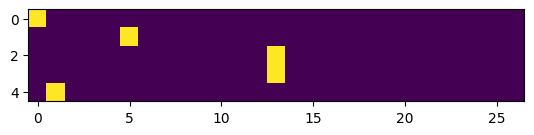

In [ ]:
plt.imshow(xenc)

In [ ]:
xenc.dtype

torch.float32

# **Construct First Neural network**

In [ ]:
w=torch.randn((27,27))
#matrix multiplication in pytorch(@)
xenc @ w


tensor([[ 0.6945,  1.6254,  1.2097, -1.2055, -1.0403,  2.1752, -1.7107,  0.5803,
          1.6838, -0.7343, -0.3636,  0.0179,  0.9215,  0.8692, -1.6721,  0.6479,
         -1.6151,  1.2895, -0.1055,  0.1688, -0.0383,  0.7330,  0.7688, -2.3374,
         -1.8504, -0.7581, -0.2335],
        [-0.8478,  0.9083, -0.4878, -0.9644,  1.3828, -1.2628, -1.2627, -0.4432,
          0.1135, -1.0101,  0.4096,  1.0776, -0.7009,  1.7220, -0.4528, -0.5971,
          1.8419,  1.8390, -2.5892,  1.3982,  0.6932,  0.4963, -0.9765,  1.5859,
         -0.9435, -0.2125, -1.7953],
        [ 0.3819, -0.8485, -0.3055,  0.7492, -0.4303, -0.4572,  0.4408, -0.4923,
          0.7983, -1.0705, -1.2341,  0.9416, -0.7903, -0.0576, -2.1430,  0.6180,
          0.0350, -1.0441, -0.0952, -1.1344, -0.6595, -0.2486, -2.0137,  0.6413,
         -0.9069,  0.8794, -1.2549],
        [ 0.3819, -0.8485, -0.3055,  0.7492, -0.4303, -0.4572,  0.4408, -0.4923,
          0.7983, -1.0705, -1.2341,  0.9416, -0.7903, -0.0576, -2.1430,  0.6180

In [ ]:
(xenc @ w)[3,13]


tensor(-0.0576)

In [ ]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
w[:,13]

tensor([ 0.8692,  2.0572,  0.6780,  2.1785, -0.5932,  1.7220, -0.0564, -0.3542,
         0.2373,  1.4847,  0.0622,  0.1441,  0.0039, -0.0576, -0.4826,  0.7207,
        -0.4522,  0.0173, -0.0610,  0.6502, -0.4611, -0.7445,  1.2087, -1.0602,
        -0.4900, -0.2302, -1.1310])

In [ ]:
#same as @ this answer
(xenc[3]*w[:,13]).sum()

tensor(-0.0576)

In [ ]:
logits=(xenc @ w) # log-counts
counts=logits.exp() #Equivalent to N
probs=counts/counts.sum(1, keepdim=True)
probs


tensor([[0.0408, 0.1035, 0.0683, 0.0061, 0.0072, 0.1794, 0.0037, 0.0364, 0.1098,
         0.0098, 0.0142, 0.0207, 0.0512, 0.0486, 0.0038, 0.0390, 0.0041, 0.0740,
         0.0183, 0.0241, 0.0196, 0.0424, 0.0440, 0.0020, 0.0032, 0.0095, 0.0161],
        [0.0087, 0.0503, 0.0125, 0.0077, 0.0809, 0.0057, 0.0057, 0.0130, 0.0227,
         0.0074, 0.0306, 0.0596, 0.0101, 0.1135, 0.0129, 0.0112, 0.1280, 0.1276,
         0.0015, 0.0821, 0.0406, 0.0333, 0.0076, 0.0991, 0.0079, 0.0164, 0.0034],
        [0.0563, 0.0164, 0.0283, 0.0813, 0.0250, 0.0243, 0.0597, 0.0235, 0.0854,
         0.0132, 0.0112, 0.0985, 0.0174, 0.0363, 0.0045, 0.0713, 0.0398, 0.0135,
         0.0349, 0.0124, 0.0199, 0.0300, 0.0051, 0.0730, 0.0155, 0.0926, 0.0110],
        [0.0563, 0.0164, 0.0283, 0.0813, 0.0250, 0.0243, 0.0597, 0.0235, 0.0854,
         0.0132, 0.0112, 0.0985, 0.0174, 0.0363, 0.0045, 0.0713, 0.0398, 0.0135,
         0.0349, 0.0124, 0.0199, 0.0300, 0.0051, 0.0730, 0.0155, 0.0926, 0.0110],
        [0.0055, 0.0315,

In [ ]:
probs[0].sum()

tensor(1.)

# **Whole Summary**

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
g=torch.Generator().manual_seed(214783647+4)
w=torch.randn((27,27), generator=g)

In [ ]:
xenc=F.one_hot(xs, num_classes=27).float()
logits=(xenc @ w) # log-counts
counts=logits.exp() #Equivalent to N
probs=counts/counts.sum(1, keepdims=True)

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
from numpy.ma.core import negative
negative_log=torch.zeros(5)
for i in range(5):
  x=xs[i].item()
  y=ys[i].item()
  print('---------')
  print(f'biagram exaample{i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
  print('input to neural network', x)
  print('output probabilities from neural network:', probs[i])
  print('label (actual next character):', y)
  p=probs[i,y]
  print('probability assigned by the net to the correct character:', p.item())
  logp=torch.log(p)
  print('log likelyhood:', logp.item())
  negative_log_likelyhood=-logp
  print('log likleyhood:', negative_log_likelyhood.item())
  negative_log[i]=negative_log_likelyhood

print('=========')
print('average negative log likelyhood, i.e loss=', negative_log_likelyhood.mean().item())


---------
biagram exaample1: .e (indexes 0, 5)
input to neural network 0
output probabilities from neural network: tensor([0.0737, 0.0119, 0.0743, 0.0795, 0.0271, 0.0274, 0.0100, 0.2405, 0.0657,
        0.0342, 0.0233, 0.0521, 0.0145, 0.0206, 0.0058, 0.0557, 0.0250, 0.0129,
        0.0174, 0.0117, 0.0103, 0.0110, 0.0026, 0.0047, 0.0435, 0.0132, 0.0309])
label (actual next character): 5
probability assigned by the net to the correct character: 0.027432525530457497
log likelyhood: -3.5960259437561035
log likleyhood: 3.5960259437561035
---------
biagram exaample2: em (indexes 5, 13)
input to neural network 5
output probabilities from neural network: tensor([0.0052, 0.0076, 0.0225, 0.0065, 0.0668, 0.0441, 0.0060, 0.0491, 0.0150,
        0.0361, 0.0087, 0.0189, 0.0323, 0.0549, 0.0518, 0.0074, 0.0090, 0.0272,
        0.1778, 0.0058, 0.0062, 0.0091, 0.0095, 0.0915, 0.0298, 0.0060, 0.1953])
label (actual next character): 13
probability assigned by the net to the correct character: 0.0549119524

# **Optimization**

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
g=torch.Generator().manual_seed(214783647+4)
w=torch.randn((27,27), generator=g,requires_grad=True)

# **Forward Pass**

In [ ]:
xenc=F.one_hot(xs, num_classes=27).float()
logits=(xenc @ w) # log-counts
counts=logits.exp() #Equivalent to N
probs=counts/counts.sum(1, keepdims=True)

In [ ]:
#Every probability of Ys[5,13,13,1,0]
probs[torch.arange(5), ys]

tensor([0.0274, 0.0549, 0.0471, 0.0117, 0.0184], grad_fn=<IndexBackward0>)

In [ ]:
#Vectorize Form of same loss value 
loss=-probs[torch.arange(5), ys].log().mean()
loss

tensor(3.5381, grad_fn=<NegBackward0>)

# **Backward pass**

In [ ]:
w.grad = None # set to zero the gradient
loss.backward()

In [ ]:
w.shape

torch.Size([27, 27])

In [ ]:
w.grad.shape

torch.Size([27, 27])

In [ ]:
w.grad

tensor([[ 0.0147,  0.0024,  0.0149,  0.0159,  0.0054, -0.1945,  0.0020,  0.0481,
          0.0131,  0.0068,  0.0047,  0.0104,  0.0029,  0.0041,  0.0012,  0.0111,
          0.0050,  0.0026,  0.0035,  0.0023,  0.0021,  0.0022,  0.0005,  0.0009,
          0.0087,  0.0026,  0.0062],
        [-0.1963,  0.0081,  0.0136,  0.0003,  0.0193,  0.0055,  0.0056,  0.0044,
          0.0006,  0.0015,  0.0006,  0.0083,  0.0158,  0.0162,  0.0072,  0.0091,
          0.0007,  0.0176,  0.0029,  0.0109,  0.0160,  0.0066,  0.0086,  0.0093,
          0.0019,  0.0030,  0.0027],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [ ]:
w.data += -0.1 * w.grad
#Every time you update this you will get better and better loss value (This is called Gradient Decent)

In [ ]:
xenc=F.one_hot(xs, num_classes=27).float()
logits=(xenc @ w) # log-counts
counts=logits.exp() #Equivalent to N
probs=counts/counts.sum(1, keepdims=True)

In [ ]:
print(loss.item())

3.5380845069885254


# **OPTIMIZATION , but this time actually**

In [ ]:
# create the dataset
xs, ys = [], []
for w in word:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


# **Gradient decent **

In [ ]:
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ w # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(w**2).mean()
  print(loss.item())
  
  # backward pass
  w.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  w.data += -50 * w.grad

2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711236000061035
2.5662729740142822
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.529768228530884
2.527859926223755
2.5260636806488037
2.5243701934814453
2.522773265838623
2.52126407623291
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704921722412
2.5107581615448
2.509854555130005
2.5089924335479736
2.5081682205200195
2.507380485534668
2.5066261291503906
2.5059032440185547
2.5052106380462646
2.5045459270477295
2.5039076805114746
2.503295421600342
2.5027060508728027
2.5021393299102783
2.5015945434570312
2.50106930732727

# Finally, sample from the 'neural net' model


In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ w # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.
